The objective of this analysis is to determine if there is a statistically significant difference in hemoglobin concentration between males and females using given dataset.

In [11]:
import pandas as pd
import numpy as np 
from scipy import stats
import matplotlib as plt

In [12]:
hgb_df = pd.read_csv('Hgb.csv')
hgb_df.set_index('Patient ID', inplace=True)
display(hgb_df)
# some values contain string characters which need to be removed
hgb_df['Hemoglobin (g/100 ml)'] = hgb_df['Hemoglobin (g/100 ml)'].replace('\s*[A-z/ ]*', '', regex=True).astype(float)
display(hgb_df['Hemoglobin (g/100 ml)'])

,Gender,Hemoglobin (g/100 ml)
Patient ID,,
1,Female,11.2
2,Female,11.5
3,Female,9.9
4,Female,12.1
5,Female,14.2
6,Male,12.9
7,Female,7.2
8,Female,12.3
9,Female,12.7


Patient ID
1     11.20
2     11.50
3      9.90
4     12.10
5     14.20
6     12.90
7      7.20
8     12.30
9     12.70
10    17.10
11    14.80
12    16.81
13    14.51
14    20.51
15    15.70
16    12.80
17    16.90
18    15.60
19    13.70
20    16.10
21    11.40
22    14.20
23    11.40
24    10.30
25    17.20
26    12.60
27    16.30
28    11.70
29    11.10
30    10.70
Name: Hemoglobin (g/100 ml), dtype: float64

In [13]:
# get the values of hemoglobin concentration in females/males
female_hb = hgb_df[hgb_df['Gender'] == 'Female']['Hemoglobin (g/100 ml)']
male_hb = hgb_df[hgb_df['Gender'] == 'Male']['Hemoglobin (g/100 ml)']
print(f'Descriptive statistics for female group:\n{female_hb.describe()}', end='\n\n')
print(f'Descriptive statistics for male group:\n{male_hb.describe()}')

Descriptive statistics for female group:
count    16.000000
mean     11.794375
std       1.787057
min       7.200000
25%      11.175000
50%      11.600000
75%      12.625000
max      14.510000
Name: Hemoglobin (g/100 ml), dtype: float64

Descriptive statistics for male group:
count    14.000000
mean     15.480000
std       2.482099
min      10.300000
25%      13.975000
50%      15.900000
75%      16.877500
max      20.510000
Name: Hemoglobin (g/100 ml), dtype: float64


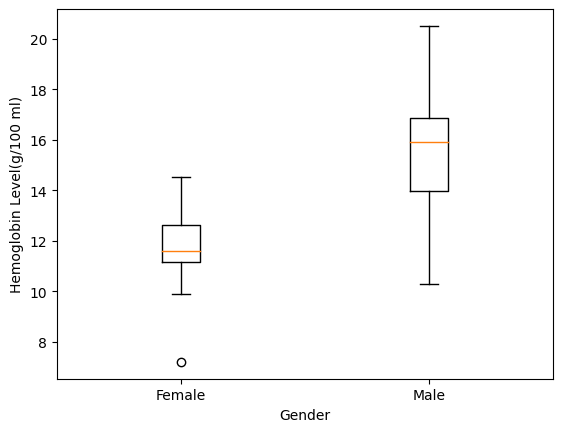

In [15]:
plt.pyplot.boxplot([female_hb, male_hb])
plt.pyplot.xticks([1, 2], ['Female', 'Male'])
plt.pyplot.xlabel('Gender')
plt.pyplot.ylabel('Hemoglobin Level(g/100 ml)')
plt.pyplot.show()

In [16]:
# Now let`s conduct Shapiro-Wilk normality test for both groups
for group, frame in hgb_df.groupby('Gender'):
  pvalue = stats.shapiro(frame['Hemoglobin (g/100 ml)'])[1]
  if pvalue > 0.05:
    print(f'Can`t reject normality for {group} group.')
  else:
    print(f'Data for the {group} group does not follow a normal distribution')


Can`t reject normality for Female group.
Can`t reject normality for Male group.


Since data in both groups are normaly distributed we can use parametric tests for further analysis.
Now we can use levene's test for equality of variances.

In [18]:
p_value = stats.levene(female_hb, male_hb)[1]
if p_value > 0.05:
  print('There is no significant difference in variances between the compared groups.')
else:
  print('There is a significant difference in variances between the compared groups.')


There is no significant difference in variances between the compared groups.


Then we can use two sample t-test (samples are independent).

In [19]:
ttest_p_value = stats.ttest_ind(male_hb, female_hb, equal_var=True)[1]
print(ttest_p_value)

6.120640841823869e-05


P-value is far less than 0.05 which indicates that there is a significant difference between the means of the compared groups. Therefore we can conclude that hemoglobin concentration in men is statistically significantly higher than in women.